In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from pandas import read_excel

from sklearn import metrics

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import OneHotEncoder
#from feature_engine import categorical_encoders as ce
from sklearn.pipeline import Pipeline

from sklearn import model_selection

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder



#import category_encoders as ce

import pickle

ModuleNotFoundError: No module named 'keras'

In [32]:
#my_sheet = 'Sheet1' # change it to your sheet name, you can find your sheet name at the bottom left of your excel file
file_name = '../data/corridas.xlsx' # change it to the name of your excel file
df = read_excel(file_name)

In [33]:
df

,Date,Distancia,Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m)
0,2022-02-13 09:53:12,5.01,34:22,6:51,875.0,3220,147
1,2022-02-06 09:34:34,2.90,33:30,11:34,519.0,1800,93
2,2022-02-05 09:14:42,8.00,54:55,6:52,875.0,5260,240
3,2022-02-02 07:39:37,5.09,35:05,6:53,871.0,3370,172
4,2022-01-30 10:58:47,5.42,37:12,6:52,874.0,3550,164
...,...,...,...,...,...,...,...
390,2015-05-31 08:45:46,17.30,1:55:01,6:39,902.0,13810,266
391,2015-05-24 10:20:25,13.62,1:35:20,7:00,857.0,10800,208
392,2015-05-03 09:44:33,10.89,1:20:27,7:23,812.0,8430,187
393,2015-04-26 10:52:26,11.10,1:12:07,6:30,924.0,8290,165


In [34]:
df['Week_Number'] = df['Date'].dt.year.astype(str) + '-' + (df['Date'].dt.week + 100).astype(str).str[1:3]
df['dia_semana'] = (df['Date'].dt.weekday + 100).astype(str).str[1:3]
df

<ipython-input-34-2a3b51ee8fb6>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['Week_Number'] = df['Date'].dt.year.astype(str) + '-' + (df['Date'].dt.week + 100).astype(str).str[1:3]


,Date,Distancia,Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Week_Number,dia_semana
0,2022-02-13 09:53:12,5.01,34:22,6:51,875.0,3220,147,2022-06,06
1,2022-02-06 09:34:34,2.90,33:30,11:34,519.0,1800,93,2022-05,06
2,2022-02-05 09:14:42,8.00,54:55,6:52,875.0,5260,240,2022-05,05
3,2022-02-02 07:39:37,5.09,35:05,6:53,871.0,3370,172,2022-05,02
4,2022-01-30 10:58:47,5.42,37:12,6:52,874.0,3550,164,2022-04,06
...,...,...,...,...,...,...,...,...,...
390,2015-05-31 08:45:46,17.30,1:55:01,6:39,902.0,13810,266,2015-22,06
391,2015-05-24 10:20:25,13.62,1:35:20,7:00,857.0,10800,208,2015-21,06
392,2015-05-03 09:44:33,10.89,1:20:27,7:23,812.0,8430,187,2015-18,06
393,2015-04-26 10:52:26,11.10,1:12:07,6:30,924.0,8290,165,2015-17,06


In [35]:
df['dia_semana'].unique()

array(['06', '05', '02', '03', '01', '04', '00'], dtype=object)

In [36]:
df['vol_semanal'] = df['Distancia'].groupby(df['Week_Number']).transform('sum')

In [37]:
df

,Date,Distancia,Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Week_Number,dia_semana,vol_semanal
0,2022-02-13 09:53:12,5.01,34:22,6:51,875.0,3220,147,2022-06,06,5.01
1,2022-02-06 09:34:34,2.90,33:30,11:34,519.0,1800,93,2022-05,06,15.99
2,2022-02-05 09:14:42,8.00,54:55,6:52,875.0,5260,240,2022-05,05,15.99
3,2022-02-02 07:39:37,5.09,35:05,6:53,871.0,3370,172,2022-05,02,15.99
4,2022-01-30 10:58:47,5.42,37:12,6:52,874.0,3550,164,2022-04,06,17.25
...,...,...,...,...,...,...,...,...,...,...
390,2015-05-31 08:45:46,17.30,1:55:01,6:39,902.0,13810,266,2015-22,06,17.30
391,2015-05-24 10:20:25,13.62,1:35:20,7:00,857.0,10800,208,2015-21,06,13.62
392,2015-05-03 09:44:33,10.89,1:20:27,7:23,812.0,8430,187,2015-18,06,10.89
393,2015-04-26 10:52:26,11.10,1:12:07,6:30,924.0,8290,165,2015-17,06,16.48


In [38]:
df['vol_semanal_ant'] = df.vol_semanal.shift(-1)

In [39]:
df

,Date,Distancia,Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Week_Number,dia_semana,vol_semanal,vol_semanal_ant
0,2022-02-13 09:53:12,5.01,34:22,6:51,875.0,3220,147,2022-06,06,5.01,15.99
1,2022-02-06 09:34:34,2.90,33:30,11:34,519.0,1800,93,2022-05,06,15.99,15.99
2,2022-02-05 09:14:42,8.00,54:55,6:52,875.0,5260,240,2022-05,05,15.99,15.99
3,2022-02-02 07:39:37,5.09,35:05,6:53,871.0,3370,172,2022-05,02,15.99,17.25
4,2022-01-30 10:58:47,5.42,37:12,6:52,874.0,3550,164,2022-04,06,17.25,17.25
...,...,...,...,...,...,...,...,...,...,...,...
390,2015-05-31 08:45:46,17.30,1:55:01,6:39,902.0,13810,266,2015-22,06,17.30,13.62
391,2015-05-24 10:20:25,13.62,1:35:20,7:00,857.0,10800,208,2015-21,06,13.62,10.89
392,2015-05-03 09:44:33,10.89,1:20:27,7:23,812.0,8430,187,2015-18,06,10.89,16.48
393,2015-04-26 10:52:26,11.10,1:12:07,6:30,924.0,8290,165,2015-17,06,16.48,16.48


In [40]:
X_train, X_test, y_train, y_test = model_selection.train_test_split( df[['dia_semana','vol_semanal_ant']],
                                                                     df['Distancia'],
                                                                     random_state=1992,
                                                                     test_size=0.25,
                                                                     shuffle=False)

In [47]:
X_train

,dia_semana,vol_semanal_ant
0,06,15.99
1,06,15.99
2,05,15.99
3,02,17.25
4,06,17.25
...,...,...
291,02,21.00
292,06,21.00
293,04,21.00
294,01,42.57


In [42]:


OneHotEncoder(sparse=False).fit_transform(X_train[['dia_semana']])


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [48]:
#onehot = ce.OneHotEncoder(cols=['dia_semana'], use_cat_names=True)

#numeric_features = ["age", "fare"]
#numeric_transformer = Pipeline(
#    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
#)

categorical_features = ["dia_semana"]
categorical_transformer = OneHotEncoder(sparse=False)

preprocessor = ColumnTransformer(
    transformers=[
        #("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)


#onehot = OneHotEncoder(['dia_semana'], sparse=False)


model_xgb = xgb.XGBRegressor(random_state=1992)

full_pipeline_xgb = Pipeline( steps=[("preprocessor", preprocessor), #("onehot", onehot),
                                     ('modelo', model_xgb) ] )

param_grid = { "modelo__n_estimators":[2,5],    #,10,20
               "modelo__max_depth":[3,4],       #,5,10
               "modelo__eta":[0.01, 0.1, 0.2, 0.3, 0.5],
               "modelo__subsample":[0.1, 0.2, 0.25, 0.5, 0.76, 0.8, 0.9]}

search_xgb = model_selection.GridSearchCV(full_pipeline_xgb,
                                          param_grid,
                                          cv=5,
                                          n_jobs=-1,
                                          scoring='neg_root_mean_squared_error') # Declaração

search_xgb.fit(X_train, y_train) # Executa o treinamento!!

best_model_xgb = search_xgb.best_estimator_

In [49]:
best_model_xgb

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(sparse=False),
                                                  ['dia_semana'])])),
                ('modelo',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, enable_categorical=False,
                              eta=0.5, gamma=0, gpu_id=-1, importance_type=None,
                              interaction_constraints='', learning_rate=0.5,
                              max_delta_step=0, max_depth=3, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=5, n_jobs=8, num_parallel_tree=1,
                              predictor='auto', random_state=1992, reg_alpha=0,
                              reg_lambda=1, scale_pos_wei

In [50]:
y_test_pred_xgb = best_model_xgb.predict(X_test)
y_test_pred_xgb

array([ 7.217172 ,  6.9264383,  8.036094 ,  7.217172 ,  8.036094 ,
        7.217172 ,  8.036094 ,  7.217172 ,  8.16864  ,  8.571163 ,
        8.036094 ,  6.9264383,  8.036094 ,  5.6064053,  8.036094 ,
        8.571163 ,  8.036094 ,  7.217172 ,  6.9264383,  8.036094 ,
        7.217172 ,  8.571163 ,  8.16864  ,  8.571163 ,  8.16864  ,
        7.217172 ,  8.16864  ,  8.571163 ,  8.16864  ,  6.9264383,
        8.036094 ,  7.217172 ,  6.9264383,  8.036094 ,  5.6064053,
        5.6064053,  8.571163 ,  8.036094 ,  8.036094 ,  7.217172 ,
        6.9264383,  8.036094 ,  8.571163 ,  8.16864  ,  8.036094 ,
        7.217172 ,  6.9264383,  8.036094 ,  8.571163 ,  8.036094 ,
       11.969059 ,  6.9264383,  6.9264383,  6.9264383,  8.036094 ,
        8.16864  ,  8.036094 ,  7.217172 ,  8.571163 ,  8.036094 ,
        7.217172 ,  8.16864  , 11.969059 ,  8.571163 ,  8.16864  ,
        7.217172 ,  6.9264383,  8.036094 ,  7.217172 ,  5.6064053,
        8.571163 ,  8.571163 ,  8.036094 ,  8.036094 ,  8.0360

In [51]:
root_mean_squared_erro_xgb = metrics.mean_squared_error( y_test, y_test_pred_xgb) ** (1/2)

print( "Raiz do Erro Quadrático Médio XGBoost:", (-1) * root_mean_squared_erro_xgb)

Raiz do Erro Quadrático Médio XGBoost: -3.407230321093723


In [52]:
X_test


,dia_semana,vol_semanal_ant
296,03,42.57
297,01,21.24
298,06,21.24
299,03,20.63
300,06,20.63
...,...,...
390,06,13.62
391,06,10.89
392,06,16.48
393,06,16.48


In [53]:
data = {'dia_semana': '06',
        'vol_semanal_ant': [30]
        }
best_model_xgb.predict(pd.DataFrame(data))

array([8.036094], dtype=float32)

In [54]:
y_pred = best_model_xgb.predict(df[['dia_semana','vol_semanal_ant']])

In [55]:
df['pred'] = y_pred

In [56]:
Pkl_Filename = "../model/best_model_xgb.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(best_model_xgb, file)

In [63]:
best_model_xgb

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(sparse=False),
                                                  ['dia_semana'])])),
                ('modelo',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, enable_categorical=False,
                              eta=0.5, gamma=0, gpu_id=-1, importance_type=None,
                              interaction_constraints='', learning_rate=0.5,
                              max_delta_step=0, max_depth=3, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=5, n_jobs=8, num_parallel_tree=1,
                              predictor='auto', random_state=1992, reg_alpha=0,
                              reg_lambda=1, scale_pos_wei

In [67]:
best_model_xgb['modelo'].save_model('../model/best_model_xgb.json')

In [58]:
xgb.__version__

'1.5.0'

In [68]:
model = xgb.XGBRegressor()
model_predictor = model.load_model('../model/best_model_xgb.json')

In [69]:
data = {'dia_semana': '06',
        'vol_semanal_ant': [30]
        }
model_predictor.predict(pd.DataFrame(data))

AttributeError: 'NoneType' object has no attribute 'predict'

In [35]:
import matplotlib.pyplot as plt

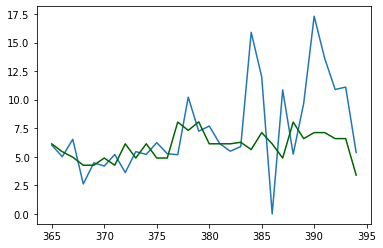

In [36]:
plt.plot(df.Distancia.tail(30))
plt.plot(df.pred.tail(30), color='darkgreen')


plt.title("")
plt.show()